# Loading libs

In [ ]:
!pip install Clustimage
!pip install cv2_imshow
!pip install --upgrade pip


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 296 kB 6.5 MB/s 
     |████████████████████████████████| 88 kB 7.4 MB/s 
     |████████████████████████████████| 1.1 MB 54.3 MB/s 
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=5485a2ae08e477611b29c24fad6574f75b24c6ce05c836b686a9115dfd0bcdb7
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=0990d290d2787494cffd266ff6ac1969afdefb48c47665cc68547058e41fe958
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.7-py3-none-any.whl size=54286 sha256=5e00ef0e9cd6e073cf007d4d7318e9f88e0b09e7e038829ff304b1cf5a52d65a
  Stored in directory: /root/.cache/pip/wheel

In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# for loading/processing the images  
from keras_preprocessing.image import load_img
from keras_preprocessing.image import img_to_array 
from keras.applications.vgg16 import preprocess_input 

# models 
from keras.applications.vgg16 import VGG16 
from keras.models import Model

# clustering and dimension reduction
import sklearn as skl
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# for everything else
import os
from clustimage import Clustimage
import tensorflow as tf
import tensorflow.keras.layers as tfkl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
import seaborn as sn
import random
import cv2
from PIL import Image, ImageEnhance, ImageOps,ImageDraw
from sklearn.metrics.cluster import normalized_mutual_info_score
from scipy import ndimage

#4. Estructura de datos

In [ ]:
from google.colab import drive 
drive.mount("/content/drive/")
!gdown --id
image_path = '/content/drive/MyDrive/Maestria/DMCyT/tp_dcyt/tp1_cyt/natural_images_sample'

for i in (os.listdir(image_path )):
  print(i)

Mounted at /content/drive/
usage: gdown [-h] [-V] [-O OUTPUT] [-q] [--fuzzy] [--id] [--proxy PROXY]
             [--speed SPEED] [--no-cookies] [--no-check-certificate]
             [--continue] [--folder] [--remaining-ok]
             url_or_id
gdown: error: the following arguments are required: url_or_id
cat
dog


In [ ]:
from keras_preprocessing import image as kimage
from statistics import mean


cl = Clustimage()
image_path = '/content/drive/MyDrive/Maestria/DMCyT/tp_dcyt/tp1_cyt/natural_images'
counter = 0
img_sizing = {}
for i in (os.listdir(image_path )):
  label = i
  counter = 0
  print(i)
  img_sizing[i] = {'x':[],'y':[]}

  for f in os.listdir(image_path + "/" + i ):
    counter = counter + 1
    #img = cl.imread(image_path + "/" + i + "/" + f)
    img = kimage.load_img(image_path + "/" + i + "/" + f)
    img_data = kimage.img_to_array(img)
    size = img_data.shape[0]*img_data.shape[2]
    img_sizing[i]['x'].append(img_data.shape[0])
    img_sizing[i]['y'].append(img_data.shape[1])
    print(img_data.shape)
    if(counter == 300):
      break
  print("mean: X =" + str(mean(img_sizing[i]['x'])) + " Y: " + str(mean(img_sizing[i]['x'])))

[clustimage] >INFO> filepath is set to [/tmp/clustimage]
[clustimage] >INFO> filepath is set to [/tmp/clustimage]
[clustimage] >INFO> filepath is set to [/tmp/clustimage]


cat
(216, 194, 3)
(357, 454, 3)
(343, 429, 3)
(272, 443, 3)
(355, 477, 3)
(369, 404, 3)
(263, 141, 3)
(335, 462, 3)
(448, 383, 3)
(297, 492, 3)
(247, 204, 3)
(126, 59, 3)
(330, 461, 3)
(222, 230, 3)
(223, 260, 3)
(328, 359, 3)
(191, 216, 3)
(347, 404, 3)
(236, 223, 3)
(335, 304, 3)
(278, 275, 3)
(103, 167, 3)
(429, 348, 3)
(386, 384, 3)
(403, 306, 3)
(474, 333, 3)
(330, 300, 3)
(276, 145, 3)
(306, 381, 3)
(317, 467, 3)
(312, 309, 3)
(219, 452, 3)
(235, 422, 3)
(463, 366, 3)
(166, 320, 3)
(157, 263, 3)
(383, 443, 3)
(375, 416, 3)
(368, 173, 3)
(199, 238, 3)
(142, 161, 3)
(374, 441, 3)
(412, 203, 3)
(208, 312, 3)
(364, 426, 3)
(351, 452, 3)
(373, 494, 3)
(309, 369, 3)
(497, 367, 3)
(246, 213, 3)
(370, 422, 3)
(184, 117, 3)
(370, 368, 3)
(123, 258, 3)
(359, 433, 3)
(459, 466, 3)
(153, 121, 3)
(431, 474, 3)
(239, 390, 3)
(255, 410, 3)
(368, 325, 3)
(364, 426, 3)
(423, 329, 3)
(321, 452, 3)
(113, 151, 3)
(246, 198, 3)
(160, 200, 3)
(364, 459, 3)
(337, 416, 3)
(352, 413, 3)
(343, 292, 3)
(44

In [ ]:
img_sizing['airplane']

In [ ]:
from keras_preprocessing import image as kimage

data = {'id': [],
	'label': [],
	'image': []}
df_nature_images = pd.DataFrame(data)
cl = Clustimage()
image_path = '/content/drive/MyDrive/Maestria/DMCyT/tp_dcyt/tp1_cyt/natural_images'
counter = 0
for i in (os.listdir(image_path )):
  label = i
  counter = 0
  for f in os.listdir(image_path + "/" + i ):
    counter = counter + 1
    print(image_path + "/" + i + "/" + f)
    #img = cl.imread(image_path + "/" + i + "/" + f)
    img = kimage.load_img(image_path + "/" + i + "/" + f, target_size=(224, 224))
    img_data = kimage.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    new_row = pd.Series(data={'id':f, 'label':i, 'image':img_data, 'path':image_path + "/" + i + "/" + f})
    df_nature_images = df_nature_images.append(new_row,ignore_index=True)
    if(counter == 300):
      break

df_nature_images.head(5)

[clustimage] >INFO> filepath is set to [/tmp/clustimage]
[clustimage] >INFO> filepath is set to [/tmp/clustimage]
[clustimage] >INFO> filepath is set to [/tmp/clustimage]


/content/drive/MyDrive/Maestria/DMCyT/tp_dcyt/tp1_cyt/natural_images/cat/cat_0060.jpg
/content/drive/MyDrive/Maestria/DMCyT/tp_dcyt/tp1_cyt/natural_images/cat/cat_0077.jpg
/content/drive/MyDrive/Maestria/DMCyT/tp_dcyt/tp1_cyt/natural_images/cat/cat_0065.jpg
/content/drive/MyDrive/Maestria/DMCyT/tp_dcyt/tp1_cyt/natural_images/cat/cat_0179.jpg
/content/drive/MyDrive/Maestria/DMCyT/tp_dcyt/tp1_cyt/natural_images/cat/cat_0104.jpg
/content/drive/MyDrive/Maestria/DMCyT/tp_dcyt/tp1_cyt/natural_images/cat/cat_0160.jpg
/content/drive/MyDrive/Maestria/DMCyT/tp_dcyt/tp1_cyt/natural_images/cat/cat_0074.jpg
/content/drive/MyDrive/Maestria/DMCyT/tp_dcyt/tp1_cyt/natural_images/cat/cat_0152.jpg
/content/drive/MyDrive/Maestria/DMCyT/tp_dcyt/tp1_cyt/natural_images/cat/cat_0129.jpg
/content/drive/MyDrive/Maestria/DMCyT/tp_dcyt/tp1_cyt/natural_images/cat/cat_0135.jpg
/content/drive/MyDrive/Maestria/DMCyT/tp_dcyt/tp1_cyt/natural_images/cat/cat_0090.jpg
/content/drive/MyDrive/Maestria/DMCyT/tp_dcyt/tp1_cyt/

,id,label,image,path
0,cat_0060.jpg,cat,"[[[[ 0. 2. 50.], [ 0. 2. 44.], [ 0. 2. 39.]...",/content/drive/MyDrive/Maestria/DMCyT/tp_dcyt/...
1,cat_0077.jpg,cat,"[[[[65. 42. 26.], [76. 55. 38.], [80. 62. 48.]...",/content/drive/MyDrive/Maestria/DMCyT/tp_dcyt/...
2,cat_0065.jpg,cat,"[[[[70. 53. 33.], [70. 53. 33.], [70. 53. 33.]...",/content/drive/MyDrive/Maestria/DMCyT/tp_dcyt/...
3,cat_0179.jpg,cat,"[[[[147. 140. 114.], [147. 141. 119.], [97. 93...",/content/drive/MyDrive/Maestria/DMCyT/tp_dcyt/...
4,cat_0104.jpg,cat,"[[[[126. 140. 141.], [127. 141. 142.], [127. 1...",/content/drive/MyDrive/Maestria/DMCyT/tp_dcyt/...


In [ ]:
df_nature_images.to_csv('preproccesed_df.csv', index=False)

In [ ]:
df_nature_images["label"].value_counts

<bound method IndexOpsMixin.value_counts of 0            cat
1            cat
2            cat
3            cat
4            cat
          ...   
2395    airplane
2396    airplane
2397    airplane
2398    airplane
2399    airplane
Name: label, Length: 2400, dtype: object>

In [ ]:
df_nature_images

,id,label,image,path
0,cat_0060.jpg,cat,"[[[[ 0. 2. 50.], [ 0. 2. 44.], [ 0. 2. 39.]...",/content/drive/MyDrive/Maestria/DMCyT/tp_dcyt/...
1,cat_0077.jpg,cat,"[[[[65. 42. 26.], [76. 55. 38.], [80. 62. 48.]...",/content/drive/MyDrive/Maestria/DMCyT/tp_dcyt/...
2,cat_0065.jpg,cat,"[[[[70. 53. 33.], [70. 53. 33.], [70. 53. 33.]...",/content/drive/MyDrive/Maestria/DMCyT/tp_dcyt/...
3,cat_0179.jpg,cat,"[[[[147. 140. 114.], [147. 141. 119.], [97. 93...",/content/drive/MyDrive/Maestria/DMCyT/tp_dcyt/...
4,cat_0104.jpg,cat,"[[[[126. 140. 141.], [127. 141. 142.], [127. 1...",/content/drive/MyDrive/Maestria/DMCyT/tp_dcyt/...
...,...,...,...,...
2395,airplane_0053.jpg,airplane,"[[[[168. 157. 163.], [172. 163. 168.], [170. 1...",/content/drive/MyDrive/Maestria/DMCyT/tp_dcyt/...
2396,airplane_0571.jpg,airplane,"[[[[118. 146. 170.], [119. 149. 173.], [119. 1...",/content/drive/MyDrive/Maestria/DMCyT/tp_dcyt/...
2397,airplane_0252.jpg,airplane,"[[[[111. 134. 142.], [113. 133. 142.], [112. 1...",/content/drive/MyDrive/Maestria/DMCyT/tp_dcyt/...
2398,airplane_0209.jpg,airplane,"[[[[ 69. 112. 146.], [ 71. 114. 149.], [ 71. 1...",/content/drive/MyDrive/Maestria/DMCyT/tp_dcyt/...


In [ ]:
img = df_nature_images.iloc[0]['image']
print(img.shape)
size = img[:,:,:,0].shape[1]*img[:,:,:,0].shape[2]
print(img[:,:,0].shape)
print(size)

(1, 224, 224, 3)
(1, 224, 3)
50176


label: person
shape: 300


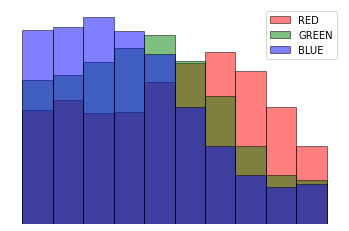

label: fruit
shape: 300


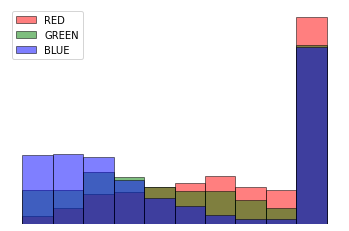

label: car
shape: 300


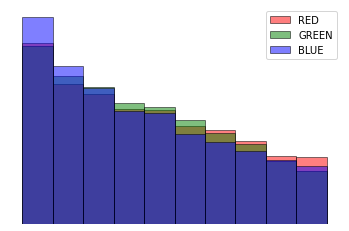

label: cat
shape: 300


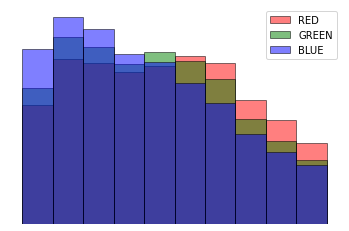

label: dog
shape: 300


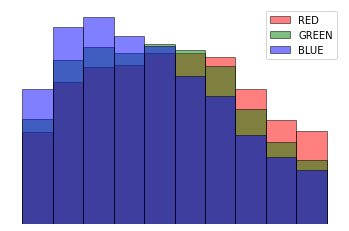

label: motorbike
shape: 300


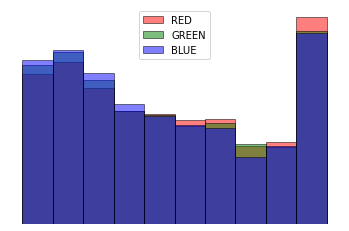

label: flower
shape: 300


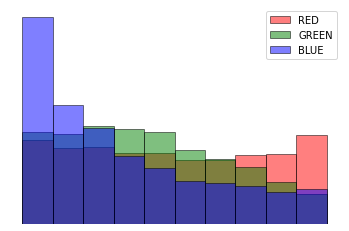

label: airplane
shape: 300


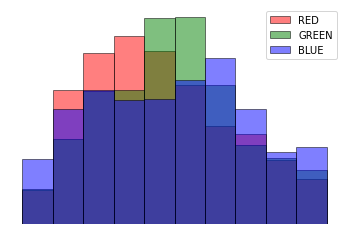

In [ ]:
R = np.array([0])
G = np.array([0])
B = np.array([0])

label = df_nature_images['label'].tolist()
unique_labels = list(set(label))

img_sizing = {}

#print(f'matrix with dimension {rows} x {cols} is {A}')
for w in unique_labels:
  R = np.array([0])
  G = np.array([0])
  B = np.array([0])
  img_sizing[w] = {'x': [], 'y':[]}
  df_tmp = df_nature_images[df_nature_images['label'] == (w)]['image']
  print("label: " + str(w))
  print("shape: " + str(df_tmp.shape[0]))
  for z in range(df_tmp.shape[0]):
    img = df_tmp.iloc[z]
    size = img[:,:,:,0].shape[1]*img[:,:,:,0].shape[2]
    img_sizing[w]['x'].append(img[:,:,:,0].shape[1])
    img_sizing[w]['y'].append(img[:,:,:,0].shape[2])
    R = np.concatenate((R, img[:,:,:,0].reshape(size)), axis=0, out=None)
    G = np.concatenate((G, img[:,:,:,1].reshape(size)), axis=0, out=None)
    B = np.concatenate((B, img[:,:,:,2].reshape(size)), axis=0, out=None)

  plt.hist(R,color='RED',bins=10,edgecolor='k',alpha=0.5,label='RED')
  plt.hist(G,color='GREEN',bins=10,edgecolor='k',alpha=0.5,label='GREEN')
  plt.hist(B,color='BLUE',bins=10,edgecolor='k',alpha=0.5,label='BLUE')
  plt.legend()
  #plt.figure(figsize=(20, 20))
  #plt.subplot(1,9,w + 1)
  plt.axis('off')
  plt.show()

# 5. Extracción de características features

In [ ]:
def extract_features(file, model):
    # levanta imagen como array 224x224 
    img = load_img(file, target_size=(224,224))
    # convierte img a numpy array (originalmente es 'PIL.Image.Image') 
    img = np.array(img) 
    # reshape para tener formato necesario para el modelo (num_of_samples, dim 1, dim 2, channels)
    reshaped_img = img.reshape(1,224,224,3) 
    # prepara imagen para modelo (función de keras)
    imgx = preprocess_input(reshaped_img)
    # extrae features
    features = model.predict(imgx, use_multiprocessing=True)
    return features

In [ ]:
datays_g = {}
def preprocess(lista, model):
    
    datays = {}
    for i in lista:
      print(i)
      featuress = extract_features(i, model)
      datays[i] = featuress               
    datays_g = datays
    # lista de filenames
    filenmss = np.array(list(datays.keys()))
    
    # lista de features
    featsss = np.array(list(datays.values()))

    # reshape 4096 features por el número de imagens 
    featsss = featsss.reshape(-1,100352)
    return filenmss, featsss

In [ ]:
# function that lets you view a cluster (based on identifier)        
from keras.preprocessing import image as kimage

def view_cluster(gps,cluster):
    #plt.figure(figsize = (25,25));
    # gets the list of filenames for a cluster
    files = gps
    # only allow up to 30 images to be shown at a time
    if len(files) > 10:
        print(f"Clipping cluster size from {len(files)} to 10")
        files = files[:9]
    # plot each image in the cluster
    for index, file in enumerate(files):
        plt.subplot(1,10,index+1);
        img = kimage.load_img('/content/drive/MyDrive/Maestria/DMCyT/tp_dcyt/tp1_cyt/natural_images/'+ df_nature_images[df_nature_images['id'] == file]['label'] +'/' + file, target_size=(224, 224))
        #img = df_nature_images[df_nature_images['id'] == file]['image']
        print('Cluster n:' + str(cluster) + " - image: " + file)

        plt.imshow(img)
        plt.title('Cluster n:' + str(cluster))
        plt.axis('off')

In [ ]:
from keras.layers import Input

image_input = Input(shape=(224,224,3))
model = VGG16(include_top=False,weights="imagenet",input_tensor=image_input)
model = Model(inputs = model.inputs, outputs = model.layers[-2].output)


58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
names, feat = preprocess(sorted(list(df_nature_images['path'])), model)

In [ ]:
feat.shape

(2400, 100352)

# 6. Clustering

In [ ]:
!pip install scikit-learn-extra 
!pip install gower

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 18.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for gower: filename=gower-0.0.5-py3-none-any.whl size=4232 sha256=4f54b3ac8dda227b191fb0814d6366722c19d402723302aab974c9d08fe482f6
  Stored in directory: /root/.cache/pip/wheels/66/07/84/d2c422512b535737ffdfd6f2420b8f22620f47b62ca1ef9e60
Successfully built gower


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.metrics.cluster import rand_score
from sklearn.decomposition import PCA
from sklearn.datasets import make_s_curve, fetch_openml, load_digits
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import MDS, Isomap, SpectralEmbedding, TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import gower
from sklearn_extra.cluster import KMedoids 
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
label_dict = {'cat': 'red', 'dog': 'blue', 'flower': 'green',  'airplane': 'pink',  
               'person': 'skyblue',   'fruit': 'orange',  'car': 'yellow', 'motorbike':'black' }
y_label = np.array(list(df_nature_images['label'].map(label_dict)))
#Consulta, veo dos green, eso porque serìa?

## Kmeans

####Hiperprametros estandar


In [ ]:
kmeans_estandar = KMeans(n_clusters=8, random_state=22).fit(feat)

In [ ]:
kmeans_estandar.labels_

array([7, 7, 7, ..., 1, 1, 1], dtype=int32)

In [ ]:
kmeans_estandar.cluster_centers_

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.6197968e-01, 0.0000000e+00],
       [4.1280222e-01, 3.7463689e-01, 6.2585449e-01, ..., 1.0542493e+00,
        5.6992426e+00, 1.7215214e+00],
       [2.6352108e-02, 4.0233135e-07, 4.1723251e-07, ..., 1.6093254e-06,
        2.9749866e+00, 3.1957924e-02],
       ...,
       [4.6697956e-01, 2.7126065e-01, 1.0905410e+00, ..., 1.1337297e+00,
        2.5151689e+00, 4.1674709e-01],
       [6.2282658e-01, 4.7215438e-01, 1.0211456e+00, ..., 1.3631959e+00,
        3.2934861e+00, 6.5470809e-01],
       [8.9934409e-02, 3.4867287e-01, 4.2196333e-02, ..., 1.7285347e-06,
        1.0091541e+00, 2.3496628e-01]], dtype=float32)

In [ ]:
rand_score(y_label, kmeans_estandar.labels_)

0.9399298318743922

In [ ]:
import gower
tmp_km_st = pd.DataFrame({'Meta': y_label, 'Encu': kmeans_estandar.labels_})# Create a DataFrame with labels and varieties as columns: df
ct_km_st = pd.crosstab(tmp_km_st['Meta'], tmp_km_st['Encu']) # Create crosstab: ct
ct_km_st

Encu,0,1,2,3,4,5,6,7
Meta,,,,,,,,
black,0,1,0,1,298,0,0,0
blue,3,17,280,0,0,0,0,0
green,0,6,0,294,0,0,0,0
orange,1,22,0,0,0,272,5,0
pink,0,300,0,0,0,0,0,0
red,0,13,0,0,0,0,0,287
skyblue,0,296,3,0,0,0,1,0
yellow,0,19,0,0,0,12,269,0


In [ ]:
def vanDongen(ct):
    n2=2*(sum(ct.apply(sum,axis=1)))
    sumi = sum(ct.apply(np.max,axis=1))
    sumj = sum(ct.apply(np.max,axis=0))
    maxsumi = np.max(ct.apply(sum,axis=1))
    maxsumj = np.max(ct.apply(sum,axis=0))
    vd = (n2 - sumi - sumj)/(n2 - maxsumi - maxsumj)
    return vd

In [ ]:
  print(vanDongen(ct_km_st))

0.13094615786722424


####Hiperpárametros n_initint modif

Aumento la cantidad de semillas que evalua el centroide

In [ ]:
kmeans_n_init = KMeans(n_clusters=8, n_init=20,random_state=22).fit(feat)

In [ ]:
kmeans_n_init.cluster_centers_

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.6197968e-01, 0.0000000e+00],
       [4.1280222e-01, 3.7463689e-01, 6.2585449e-01, ..., 1.0542493e+00,
        5.6992426e+00, 1.7215214e+00],
       [2.6352108e-02, 4.0233135e-07, 4.1723251e-07, ..., 1.6093254e-06,
        2.9749866e+00, 3.1957924e-02],
       ...,
       [4.6697956e-01, 2.7126065e-01, 1.0905410e+00, ..., 1.1337297e+00,
        2.5151689e+00, 4.1674709e-01],
       [6.2282658e-01, 4.7215438e-01, 1.0211456e+00, ..., 1.3631959e+00,
        3.2934861e+00, 6.5470809e-01],
       [8.9934409e-02, 3.4867287e-01, 4.2196333e-02, ..., 1.7285347e-06,
        1.0091541e+00, 2.3496628e-01]], dtype=float32)

In [ ]:
rand_score(y_label, kmeans_n_init.labels_)

0.9399298318743922

In [ ]:

tmp_n_init = pd.DataFrame({'Meta': y_label, 'Encu': kmeans_n_init.labels_})# Create a DataFrame with labels and varieties as columns: df
ct_n_init = pd.crosstab(tmp_n_init['Meta'], tmp_n_init['Encu']) # Create crosstab: ct
ct_n_init

Encu,0,1,2,3,4,5,6,7
Meta,,,,,,,,
black,0,1,0,1,298,0,0,0
blue,3,17,280,0,0,0,0,0
green,0,6,0,294,0,0,0,0
orange,1,22,0,0,0,272,5,0
pink,0,300,0,0,0,0,0,0
red,0,13,0,0,0,0,0,287
skyblue,0,296,3,0,0,0,1,0
yellow,0,19,0,0,0,12,269,0


In [ ]:
print(vanDongen(ct_n_init))

0.13094615786722424


####Hiperpárametros max_iter modif

Aumento la cantidad de iteraciones

In [ ]:
kmeans_max_iter = KMeans(n_clusters=8, max_iter=400,random_state=22).fit(feat)

In [ ]:
kmeans_max_iter.labels_

array([7, 7, 7, ..., 1, 1, 1], dtype=int32)

In [ ]:
kmeans_max_iter.cluster_centers_

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.6197968e-01, 0.0000000e+00],
       [4.1280222e-01, 3.7463689e-01, 6.2585449e-01, ..., 1.0542493e+00,
        5.6992426e+00, 1.7215214e+00],
       [2.6352108e-02, 4.0233135e-07, 4.1723251e-07, ..., 1.6093254e-06,
        2.9749866e+00, 3.1957924e-02],
       ...,
       [4.6697956e-01, 2.7126065e-01, 1.0905410e+00, ..., 1.1337297e+00,
        2.5151689e+00, 4.1674709e-01],
       [6.2282658e-01, 4.7215438e-01, 1.0211456e+00, ..., 1.3631959e+00,
        3.2934861e+00, 6.5470809e-01],
       [8.9934409e-02, 3.4867287e-01, 4.2196333e-02, ..., 1.7285347e-06,
        1.0091541e+00, 2.3496628e-01]], dtype=float32)

In [ ]:
rand_score(y_label, kmeans_max_iter.labels_)

0.9399298318743922

In [ ]:
tmp_max_iter = pd.DataFrame({'Meta': y_label, 'Encu': kmeans_max_iter.labels_})# Create a DataFrame with labels and varieties as columns: df
ct_max_iter = pd.crosstab(tmp_max_iter['Meta'], tmp_max_iter['Encu']) # Create crosstab: ct
ct_max_iter

Encu,0,1,2,3,4,5,6,7
Meta,,,,,,,,
black,0,1,0,1,298,0,0,0
blue,3,17,280,0,0,0,0,0
green,0,6,0,294,0,0,0,0
orange,1,22,0,0,0,272,5,0
pink,0,300,0,0,0,0,0,0
red,0,13,0,0,0,0,0,287
skyblue,0,296,3,0,0,0,1,0
yellow,0,19,0,0,0,12,269,0


In [ ]:
print(vanDongen(ct_max_iter))

0.13094615786722424


##PCA

####PCA n_components=2

In [ ]:
pca = PCA(n_components=2, random_state=22) 

In [ ]:
pca.fit(feat)
x_pca = pca.transform(feat)

In [ ]:
kmeans = KMeans(n_clusters=8).fit(x_pca)

In [ ]:
kmeans.labels_

array([0, 0, 0, ..., 5, 5, 5], dtype=int32)

In [ ]:
kmeans.cluster_centers_

array([[-122.72362 ,   44.176834],
       [1107.7703  , -634.15485 ],
       [ 498.4514  ,  806.8323  ],
       [-409.9167  , -172.3146  ],
       [ 760.85126 , 1269.4774  ],
       [-290.16016 ,  -48.77822 ],
       [1567.1398  , -877.3142  ],
       [ 704.6403  , -397.5488  ]], dtype=float32)

Rand Score PCA 2

In [ ]:
rand_score(y_label, kmeans.labels_)

0.7994900653049882

In [ ]:

tmp_kmeans_pca20 = pd.DataFrame({'Meta': y_label, 'Encu': kmeans.labels_})# Create a DataFrame with labels and varieties as columns: df
ct_kmeans_pca20 = pd.crosstab(tmp_kmeans_pca20['Meta'], tmp_kmeans_pca20['Encu']) # Create crosstab: ct
ct_kmeans_pca20

Encu,0,1,2,3,4,5,6,7
Meta,,,,,,,,
black,3,0,174,0,122,0,0,1
blue,21,0,0,11,0,268,0,0
green,1,121,0,0,0,0,86,92
orange,8,0,0,177,0,115,0,0
pink,1,0,0,0,0,299,0,0
red,299,0,0,0,0,1,0,0
skyblue,17,0,0,4,0,279,0,0
yellow,3,0,0,224,0,73,0,0


In [ ]:
print(vanDongen(ct_kmeans_pca20))

0.44502164502164504


####PCA n_components=40

In [ ]:
pca_40 = PCA(n_components=40, random_state=22) 
pca_40.fit(feat)
x_pca_40 = pca_40.transform(feat)
kmeans_pca40 = KMeans(n_clusters=8,random_state=0).fit(x_pca_40)

Rand Score PCA 40

In [ ]:
rand_score(y_label, kmeans_pca40.labels_)

0.9802605252188412

In [ ]:

tmp_kmeans_pca_40 = pd.DataFrame({'Meta': y_label, 'Encu': kmeans_pca40.labels_})# Create a DataFrame with labels and varieties as columns: df
ct_kmeans_pca_40 = pd.crosstab(tmp_kmeans_pca_40['Meta'], tmp_kmeans_pca_40['Encu']) # Create crosstab: ct
ct_kmeans_pca_40

Encu,0,1,2,3,4,5,6,7
Meta,,,,,,,,
black,0,0,1,1,0,298,0,0
blue,0,0,16,0,0,0,284,0
green,0,0,6,294,0,0,0,0
orange,0,9,21,0,0,0,0,270
pink,0,0,0,0,300,0,0,0
red,287,0,13,0,0,0,0,0
skyblue,0,1,298,0,0,0,1,0
yellow,0,274,18,0,0,0,0,8


In [ ]:
print(vanDongen(ct_kmeans_pca_40))

0.04603828446813666


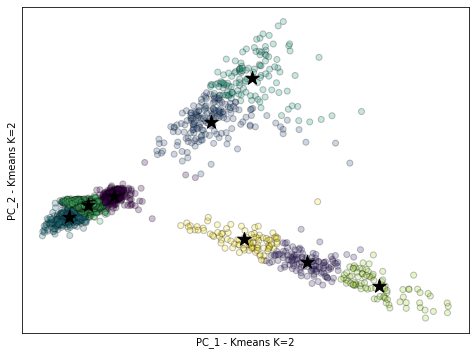

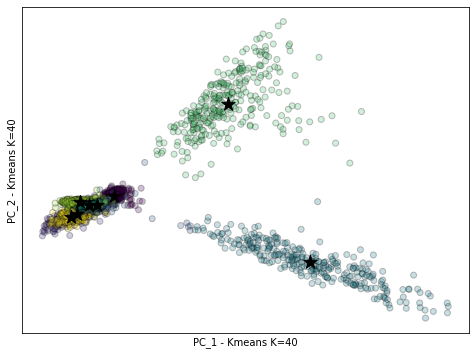

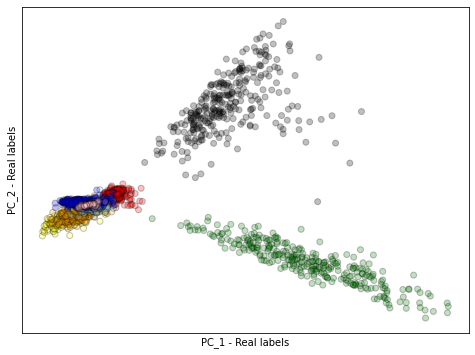

In [ ]:
centroides_sklean_pca = kmeans.cluster_centers_

plt.figure(1, figsize=(8, 6))
plt.clf()
#plt.scatter(x[:, 0], x[:, 1], color='k', alpha=.25, edgecolor='k')
plt.scatter(x_pca[:, 0], x_pca[:, 1], 
            c=kmeans.labels_, alpha=.25, edgecolor='k')
#c=kmeans.labels_, alpha=.25, edgecolor='k')
plt.scatter(centroides_sklean_pca[:, 0], centroides_sklean_pca[:, 1], 
            s=200, marker = '*', c='k', edgecolor=None)
plt.xlabel('PC_1 - Kmeans K=2')
plt.ylabel('PC_2 - Kmeans K=2')
plt.xticks(())
plt.yticks(())
plt.show()


plt.figure(1, figsize=(8, 6))
plt.clf()
#plt.scatter(x[:, 0], x[:, 1], color='k', alpha=.25, edgecolor='k')
plt.scatter(x_pca_40[:, 0], x_pca_40[:, 1], 
            c=kmeans_pca40.labels_, alpha=.25, edgecolor='k')
#c=kmeans.labels_, alpha=.25, edgecolor='k')
plt.scatter(kmeans_pca40.cluster_centers_[:, 0], kmeans_pca40.cluster_centers_[:, 1], 
            s=200, marker = '*', c='k', edgecolor=None)
plt.xlabel('PC_1 - Kmeans K=40')
plt.ylabel('PC_2 - Kmeans K=40')
plt.xticks(())
plt.yticks(())
plt.show()


plt.figure(1, figsize=(8, 6))
plt.clf()
#plt.scatter(x[:, 0], x[:, 1], color='k', alpha=.25, edgecolor='k')
plt.scatter(x_pca[:, 0], x_pca[:, 1], 
            c=y_label, alpha=.25, edgecolor='k')
#c=kmeans.labels_, alpha=.25, edgecolor='k')
#plt.scatter(centroides_sklean_pca[:, 0], centroides_sklean_pca[:, 1], 
#            s=200, marker = '*', c='k', edgecolor=None)
plt.xlabel('PC_1 - Real labels')
plt.ylabel('PC_2 - Real labels')
plt.xticks(())
plt.yticks(())
plt.show()

Metricas Silhuette - Inertia

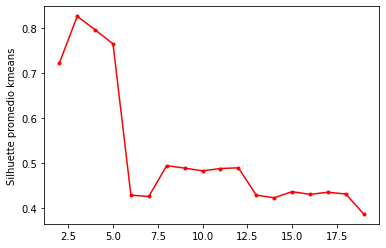

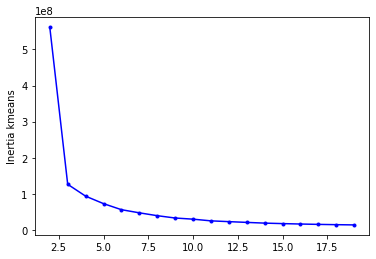

In [ ]:
range_k = [i for i in range(2,20)]
silh_kmeans = []
sse_kmeans = []
inertia_kmeans = []

for k in range_k:
    kmeans = KMeans(n_clusters=k).fit(x_pca)
    silh_kmeans.append(silhouette_score(x_pca,kmeans.labels_))
    #sse.append(calcula_sse_kmeans(kmeans,x_pca,4))
    inertia_kmeans.append(kmeans.inertia_)

plt.plot(range_k,silh_kmeans,'r.-')
plt.ylabel('Silhuette promedio kmeans')
plt.show()

plt.plot(range_k,inertia_kmeans,'r.-', color='blue')
plt.ylabel('Inertia kmeans')
plt.show()

## K medoids

In [ ]:
def calcula_sse_kmedoids(KM,d):
  se = []
  for i in range(0,KM.n_clusters):
    se.append(sum(d[KM.medoid_indices_[i],KM.labels_==i]**2))
  return sum(se)

In [ ]:
d_meta = gower.gower_matrix(x_pca)

In [ ]:
KM_meta=KMedoids(n_clusters=8,metric='precomputed',init='k-medoids++', method='pam').fit(d_meta)

In [ ]:
KM_dist_eucl = KMedoids(n_clusters=8,metric='euclidean',init='heuristic').fit(x_pca)

In [ ]:
print(KM_meta.medoid_indices_)
print(KM_meta.labels_)
print(KM_meta.n_clusters)

[1036 2134  383 1951  161  456 2090 2092]
[4 4 4 ... 1 1 1]
8


In [ ]:
print(KM_meta.labels_)
print(KM_meta.medoid_indices_)

[4 4 4 ... 1 1 1]
[1036 2134  383 1951  161  456 2090 2092]


In [ ]:
print(silhouette_score(d_meta,KM_meta.labels_))
print(calcula_sse_kmedoids(KM_meta,d_meta))
silhouette_samples(d_meta,KM_meta.labels_)

0.52079964
2.127176522693908


array([0.5777915 , 0.50919795, 0.6851026 , ..., 0.68709594, 0.7316832 ,
       0.690282  ], dtype=float32)

In [ ]:
from sklearn.metrics import pairwise_distances
d_encu_eucl = pairwise_distances(x_pca, metric='euclidean')
print(calcula_sse_kmedoids(KM_dist_eucl,d_encu_eucl))
print(silhouette_score(x_pca,KM_dist_eucl.labels_,metric='euclidean'))

95645655.2076993
0.41002437


In [ ]:
se = []
i = 7
print(KM_meta.labels_[700])

4


In [ ]:
print(len(KM_meta.labels_))
print(KM_meta.cluster_centers_)

2400
None


In [ ]:
KM_meta.cluster_centers_

In [ ]:
rand_score(y_label, KM_meta.labels_)

0.8077667778240933

In [ ]:
rand_score(y_label, KM_dist_eucl.labels_)

0.9029567875503682

In [ ]:
tmp_KM_meta = pd.DataFrame({'Meta': y_label, 'Encu': KM_meta.labels_})# Create a DataFrame with labels and varieties as columns: df
ct_KM_meta = pd.crosstab(tmp_KM_meta['Meta'], tmp_KM_meta['Encu']) # Create crosstab: ct
ct_KM_meta

Encu,0,1,2,3,4,5,6,7
Meta,,,,,,,,
black,0,0,168,2,1,129,0,0
blue,54,223,0,0,23,0,0,0
green,0,0,0,111,1,0,109,79
orange,184,106,0,0,10,0,0,0
pink,0,299,0,0,1,0,0,0
red,0,1,0,0,299,0,0,0
skyblue,4,278,0,0,18,0,0,0
yellow,230,67,0,0,3,0,0,0


In [ ]:
tmp_KM_meta_eucl = pd.DataFrame({'Meta': y_label, 'Cluster': KM_dist_eucl.labels_})# Create a DataFrame with labels and varieties as columns: df
ct_KM_meta_eucl = pd.crosstab(tmp_KM_meta_eucl['Meta'], tmp_KM_meta_eucl['Cluster']) # Create crosstab: ct
ct_KM_meta_eucl

Cluster,0,1,2,3,4,5,6,7
Meta,,,,,,,,
black,0,0,1,0,0,10,0,289
blue,39,59,0,1,1,15,185,0
green,0,0,287,0,0,13,0,0
orange,29,35,0,91,134,4,7,0
pink,47,246,0,0,4,0,3,0
red,9,0,0,0,0,291,0,0
skyblue,182,87,0,1,18,7,5,0
yellow,11,17,0,146,121,2,3,0


In [ ]:
pca_40 = PCA(n_components=40, random_state=22) 
pca_40.fit(feat)
x_pca_40 = pca_40.transform(feat)
d_meta_40 = gower.gower_matrix(x_pca_40)
#No deberian ser 8 clusters?
KM_meta_40 =KMedoids(n_clusters=7,metric='precomputed',init='k-medoids++', method='pam').fit(d_meta_40)
KM_dist_euclid_40 =KMedoids(n_clusters=7,metric='euclidean',init='heuristic').fit(x_pca_40)

In [ ]:
print(vanDongen(ct_KM_meta))

0.4378899602949518


In [ ]:
rand_score(y_label, KM_meta_40.labels_)

0.8722870640544671

In [ ]:
tmp_KM_meta_40 = pd.DataFrame({'Meta': y_label, 'Encu': KM_meta_40.labels_})# Create a DataFrame with labels and varieties as columns: df
ct_KM_meta_40 = pd.crosstab(tmp_KM_meta_40['Meta'], tmp_KM_meta_40['Encu']) # Create crosstab: ct
ct_KM_meta_40

Encu,0,1,2,3,4,5,6
Meta,,,,,,,
black,109,17,0,171,0,0,3
blue,0,87,0,0,0,213,0
green,281,19,0,0,0,0,0
orange,1,98,1,0,1,7,192
pink,0,23,277,0,0,0,0
red,0,62,0,0,238,0,0
skyblue,0,206,93,0,0,0,1
yellow,0,72,2,0,0,0,226


In [ ]:
print(vanDongen(ct_KM_meta_40))

0.3534218590398366


In [ ]:
print(KM_meta_40.cluster_centers_)

None


In [ ]:
KM_meta_40.medoid_indices_

array([2034, 1359, 2282,  468,  180, 1746,  894])

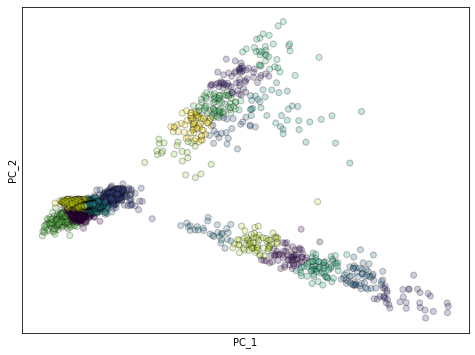

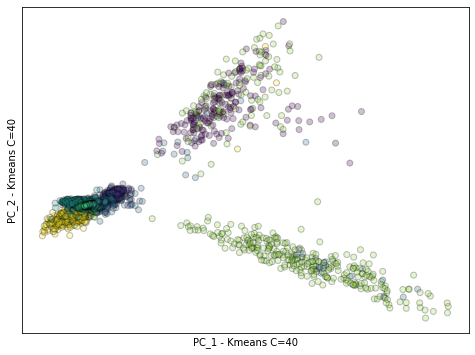

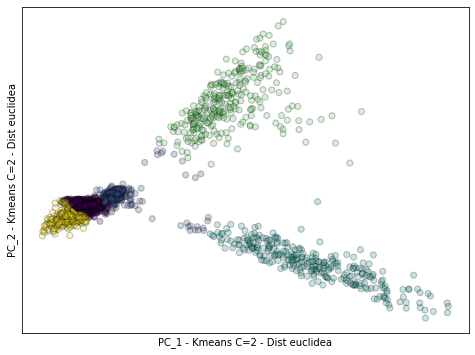

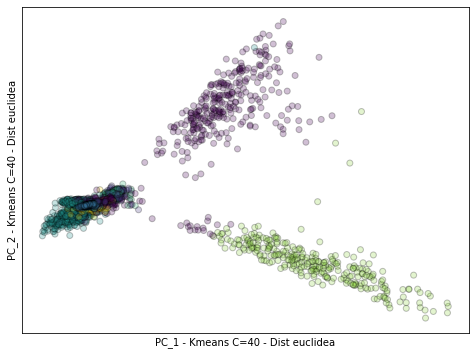

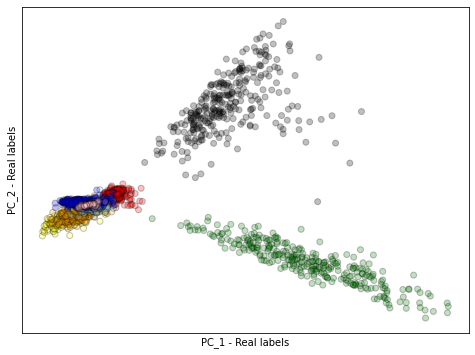

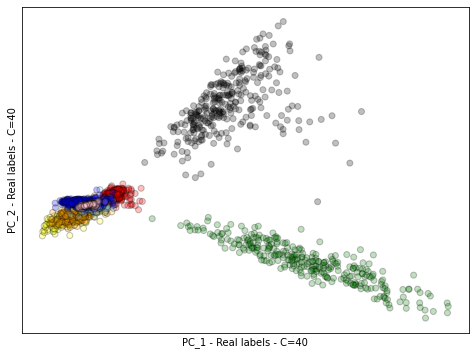

In [ ]:
centroides_sklean_pca_kmedoids = KM_meta.cluster_centers_

plt.figure(1, figsize=(8, 6))
plt.clf()
#plt.scatter(x[:, 0], x[:, 1], color='k', alpha=.25, edgecolor='k')
plt.scatter(x_pca[:, 0], x_pca[:, 1], 
            c=kmeans.labels_, alpha=.25, edgecolor='k')
#plt.scatter(centroides_sklean_pca_kmedoids[:, 0], centroides_sklean_pca_kmedoids[:, 1], 
#            s=200, marker = '*', c='k', edgecolor=None) FALTAN LOS CENTROIDES
plt.xlabel('PC_1')
plt.ylabel('PC_2')
plt.xticks(())
plt.yticks(())
plt.show()



plt.figure(1, figsize=(8, 6))
plt.clf()
#plt.scatter(x[:, 0], x[:, 1], color='k', alpha=.25, edgecolor='k')
plt.scatter(x_pca_40[:, 0], x_pca_40[:, 1], 
            c=KM_meta_40.labels_, alpha=.25, edgecolor='k')
#c=kmeans.labels_, alpha=.25, edgecolor='k')
#plt.scatter(KM_meta_40.cluster_centers_[:, 0], KM_meta_40.cluster_centers_[:, 1], 
 #           s=200, marker = '*', c='k', edgecolor=None)
plt.xlabel('PC_1 - Kmeans C=40')
plt.ylabel('PC_2 - Kmeans C=40')
plt.xticks(())
plt.yticks(())
plt.show()

plt.figure(1, figsize=(8, 6))
plt.clf()
#plt.scatter(x[:, 0], x[:, 1], color='k', alpha=.25, edgecolor='k')
plt.scatter(x_pca[:, 0], x_pca[:, 1], 
            c=KM_dist_eucl.labels_, alpha=.25, edgecolor='k')
#c=kmeans.labels_, alpha=.25, edgecolor='k')
#plt.scatter(KM_meta_40.cluster_centers_[:, 0], KM_meta_40.cluster_centers_[:, 1], 
 #           s=200, marker = '*', c='k', edgecolor=None)
plt.xlabel('PC_1 - Kmeans C=2 - Dist euclidea')
plt.ylabel('PC_2 - Kmeans C=2 - Dist euclidea')
plt.xticks(())
plt.yticks(())
plt.show()


plt.figure(1, figsize=(8, 6))
plt.clf()
#plt.scatter(x[:, 0], x[:, 1], color='k', alpha=.25, edgecolor='k')
plt.scatter(x_pca[:, 0], x_pca[:, 1], 
            c=KM_dist_euclid_40.labels_, alpha=.25, edgecolor='k')
#c=kmeans.labels_, alpha=.25, edgecolor='k')
#plt.scatter(KM_meta_40.cluster_centers_[:, 0], KM_meta_40.cluster_centers_[:, 1], 
 #           s=200, marker = '*', c='k', edgecolor=None)
plt.xlabel('PC_1 - Kmeans C=40 - Dist euclidea')
plt.ylabel('PC_2 - Kmeans C=40 - Dist euclidea')
plt.xticks(())
plt.yticks(())
plt.show()



plt.figure(1, figsize=(8, 6))
plt.clf()
#plt.scatter(x[:, 0], x[:, 1], color='k', alpha=.25, edgecolor='k')
plt.scatter(x_pca[:, 0], x_pca[:, 1], 
            c=y_label, alpha=.25, edgecolor='k')
#c=kmeans.labels_, alpha=.25, edgecolor='k')
#plt.scatter(centroides_sklean_pca[:, 0], centroides_sklean_pca[:, 1], 
#            s=200, marker = '*', c='k', edgecolor=None)
plt.xlabel('PC_1 - Real labels')
plt.ylabel('PC_2 - Real labels')
plt.xticks(())
plt.yticks(())
plt.show()


plt.figure(1, figsize=(8, 6))
plt.clf()
#plt.scatter(x[:, 0], x[:, 1], color='k', alpha=.25, edgecolor='k')
plt.scatter(x_pca_40[:, 0], x_pca_40[:, 1], 
            c=y_label, alpha=.25, edgecolor='k')
#c=kmeans.labels_, alpha=.25, edgecolor='k')
#plt.scatter(centroides_sklean_pca[:, 0], centroides_sklean_pca[:, 1], 
#            s=200, marker = '*', c='k', edgecolor=None)
plt.xlabel('PC_1 - Real labels - C=40')
plt.ylabel('PC_2 - Real labels - C=40')
plt.xticks(())
plt.yticks(())
plt.show()

In [ ]:
kmeans.labels_

array([ 4,  4,  4, ...,  0,  0, 15], dtype=int32)

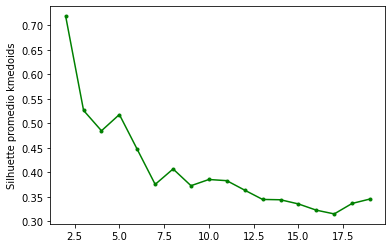

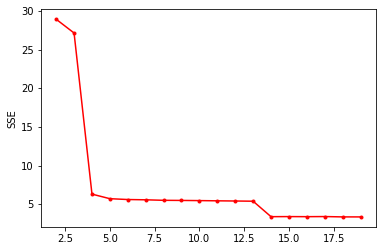

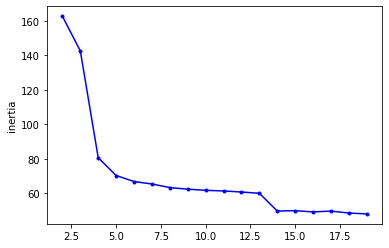

In [ ]:
range_k = [i for i in range(2,20)]
silh_kmedoids = []
sse_kmedoids = []
inertia_kmedoids = []

for k in range_k:
    KM_meta = KMedoids(n_clusters=k,init='heuristic',metric='precomputed').fit(d_meta)
    silh_kmedoids.append(silhouette_score(x_pca,KM_meta.labels_))
    sse_kmedoids.append(calcula_sse_kmedoids(KM_meta,d_meta))
    inertia_kmedoids.append(KM_meta.inertia_)

plt.plot(range_k,silh_kmedoids,'r.-',color='green')
plt.ylabel('Silhuette promedio kmedoids')
#plt.plot(range_k,silh_kmeans,'r.-')
#plt.ylabel('Silhuette promedio kmeans')
plt.show()

plt.plot(range_k,sse_kmedoids,'r.-')
plt.ylabel('SSE')
plt.show()

plt.plot(range_k,inertia_kmedoids,'r.-',color='blue')
plt.ylabel('inertia')
plt.show()



4526222526.917969
0.0688478
4389259368.461914
-0.005862147
4033421452.0720215
0.050451674
3553236940.3884277
0.10672048
3541725851.5544434
0.13703828
3397582319.8395996
0.16023287
3200668504.9802246
0.14806788
2685179022.425537
0.21266481
2536652361.472412
0.20615712
2518741052.152588
0.19027247
2463141167.566162
0.20128433
2412195430.128662
0.19701804
2398418733.113037
0.17579627
2359331863.894287
0.1728608
2361331593.191162
0.16578868
2345003716.1018066
0.14364307
2306468576.0080566
0.14484829
2288001602.210205
0.14173172


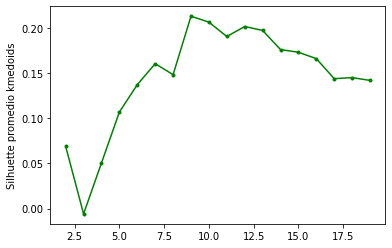

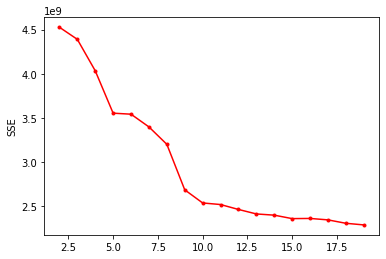

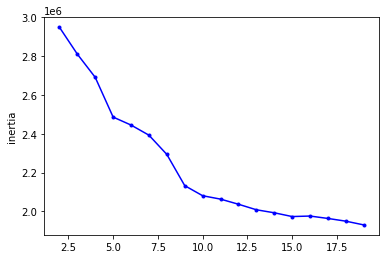

In [ ]:
from sklearn.metrics import pairwise_distances


range_k = [i for i in range(2,20)]
silh_kmedoids = []
sse_kmedoids = []
inertia_kmedoids = []

for k in range_k:
    KM_dist_euclid_40 =KMedoids(n_clusters=k,metric='euclidean',init='heuristic').fit(x_pca_40)
    d_encu_eucl = pairwise_distances(x_pca_40, metric='euclidean')
    print(calcula_sse_kmedoids(KM_dist_euclid_40,d_encu_eucl))
    print(silhouette_score(x_pca_40,KM_dist_euclid_40.labels_,metric='euclidean'))
    silh_kmedoids.append(silhouette_score(x_pca_40,KM_dist_euclid_40.labels_,metric='euclidean'))
    sse_kmedoids.append(calcula_sse_kmedoids(KM_dist_euclid_40,d_encu_eucl))
    inertia_kmedoids.append(KM_dist_euclid_40.inertia_)

plt.plot(range_k,silh_kmedoids,'r.-',color='green')
plt.ylabel('Silhuette promedio kmedoids')
#plt.plot(range_k,silh_kmeans,'r.-')
#plt.ylabel('Silhuette promedio kmeans')
plt.show()

plt.plot(range_k,sse_kmedoids,'r.-')
plt.ylabel('SSE')
plt.show()

plt.plot(range_k,inertia_kmedoids,'r.-',color='blue')
plt.ylabel('inertia')
plt.show()

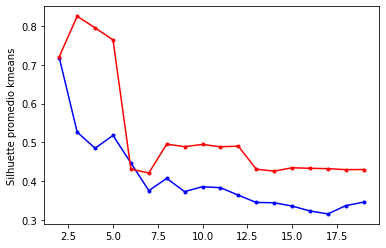

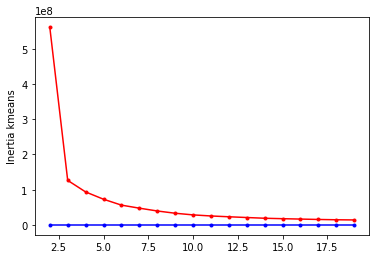

In [ ]:
range_k = [i for i in range(2,20)]
silh_kmedoids = []
inertia_kmedoids = []
silh_kmeans = []
inertia_kmeans = []

for k in range_k:
    KM_meta = KMedoids(n_clusters=k,init='heuristic',metric='precomputed').fit(d_meta)
    kmeans = KMeans(n_clusters=k).fit(x_pca)

    silh_kmedoids.append(silhouette_score(x_pca,KM_meta.labels_))
    inertia_kmedoids.append(KM_meta.inertia_)
    silh_kmeans.append(silhouette_score(x_pca,kmeans.labels_))
    inertia_kmeans.append(kmeans.inertia_)

plt.plot(range_k,silh_kmedoids,'r.-',color='blue')
plt.ylabel('Silhuette promedio kmedoids')
plt.plot(range_k,silh_kmeans,'r.-',color='red')
plt.ylabel('Silhuette promedio kmeans')
plt.show()

plt.plot(range_k,inertia_kmedoids,'r.-',color='blue')
plt.ylabel('Inertia kmedoids')
plt.plot(range_k,inertia_kmeans,'r.-' ,color='red')
plt.ylabel('Inertia kmeans')
plt.show()

## Clustering Jerárquico

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import squareform

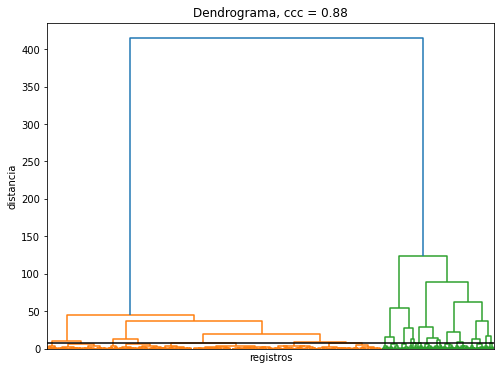

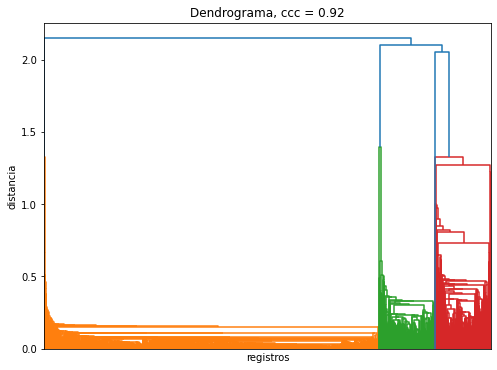

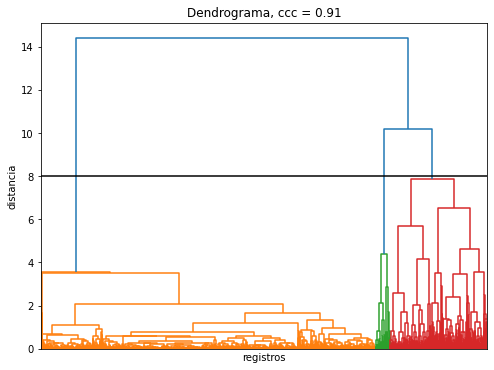

In [ ]:
Z = linkage(d_meta, 'ward')
c,_=cophenet(Z,Y=squareform(d_meta))
plt.figure(1,figsize=(8, 6))
plt.title('Dendrograma, ccc = %0.2f'%c)
plt.xlabel('registros')
plt.ylabel('distancia')
plt.axhline(y=8, c='k')
dn = dendrogram(Z,no_labels=True)

Z = linkage(d_meta, 'single')
c,_=cophenet(Z,Y=squareform(d_meta))
plt.figure(2,figsize=(8, 6))
plt.title('Dendrograma, ccc = %0.2f'%c)
plt.xlabel('registros')
plt.ylabel('distancia')
plt.axhline(y=8, c='k')
dn = dendrogram(Z,no_labels=True)

Z = linkage(d_meta, 'average')
c,_=cophenet(Z,Y=squareform(d_meta))
plt.figure(3,figsize=(8, 6))
plt.title('Dendrograma, ccc = %0.2f'%c)
plt.xlabel('registros')
plt.ylabel('distancia')
plt.axhline(y=8, c='k')
dn = dendrogram(Z,no_labels=True)

## TSNE

In [ ]:
print(len(feat))
print(len(names))

2400
2400


In [ ]:
tsne = TSNE(n_components=2,perplexity=30)
Xred = tsne.fit_transform(feat)

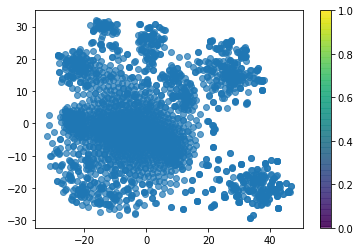

In [ ]:
plt.scatter(Xred[:,0],Xred[:,1],cmap=plt.cm.Spectral,alpha=0.7)
plt.colorbar();

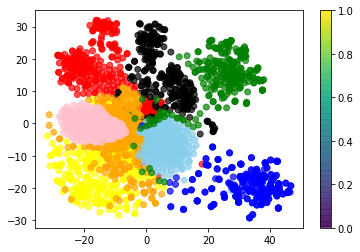

In [ ]:
plt.scatter(Xred[:,0],Xred[:,1],c=y_label,cmap=plt.cm.Spectral,alpha=0.7)
plt.colorbar();

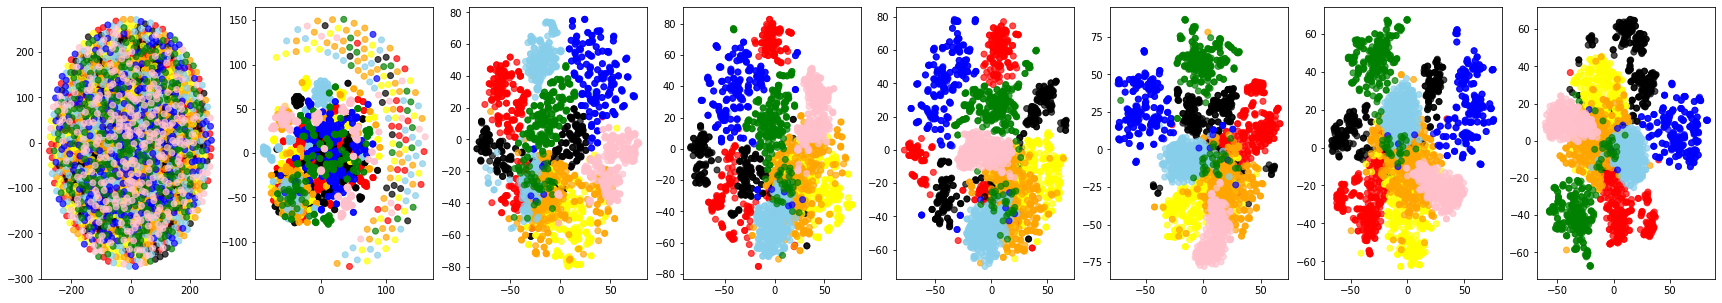

In [ ]:
PERPLEXITY = [3, 5,10,20,30,50,75,100]
fig, ax = plt.subplots(nrows=1,ncols=len(PERPLEXITY),figsize=(30,5))
for i in range(0,len(PERPLEXITY)):
  tsne = TSNE(n_components=2,perplexity=i)
  Xred = tsne.fit_transform(feat)
  #mds = MDS(n_components=2, n_jobs = 8, eps=0.1, max_iter=ITER[i])
  #Xred_mds = mds.fit_transform(feat)
  #stress.append(tsne.kl_divergence_)
  ax[i].scatter(Xred[:,0],Xred[:,1],c=y_label,cmap=plt.cm.Spectral,alpha=0.7)

## MDS

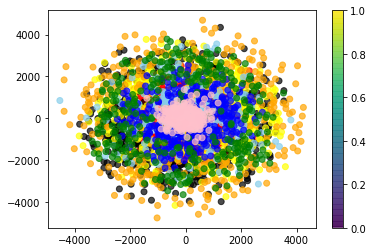

In [ ]:
mds = MDS(n_components=2, n_jobs = 8, eps=0.1, max_iter=100)
Xred_mds = mds.fit_transform(feat)
plt.scatter(Xred_mds[:,0],Xred_mds[:,1],c=y_label,cmap=plt.cm.Spectral,alpha=0.7)
plt.colorbar();

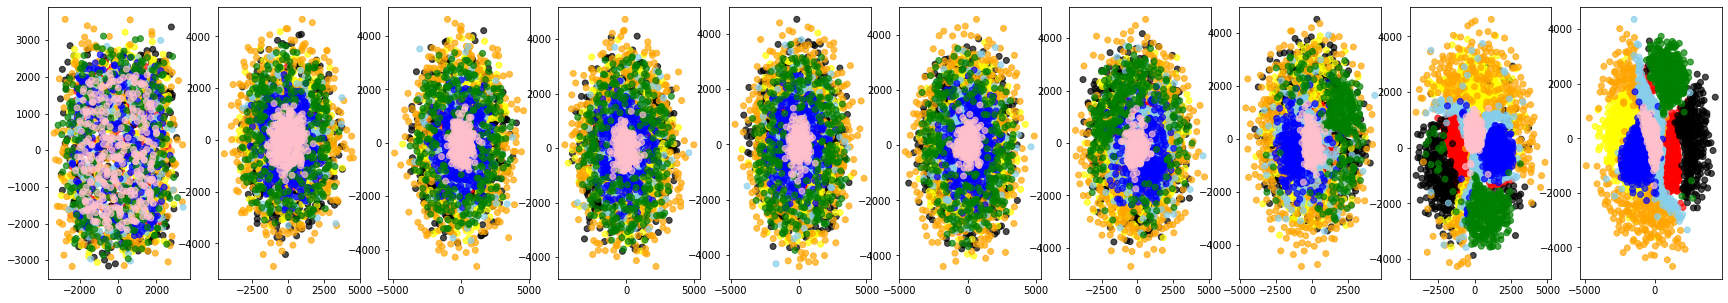

In [ ]:
#plt.figure(figsize=(5,30))
stress = []
ITER = [1,5,10,20,50,100,150,250,500,1000]
fig, ax = plt.subplots(nrows=1,ncols=len(ITER),figsize=(30,5))
for i in range(0,len(ITER)):
  mds = MDS(n_components=2, n_jobs = 8, eps=0.1, max_iter=ITER[i])
  Xred_mds = mds.fit_transform(feat)
  stress.append(mds.stress_)
  ax[i].scatter(Xred_mds[:,0],Xred_mds[:,1],c=y_label,cmap=plt.cm.Spectral,alpha=0.7)
#ax[i].colorbar();

# 7. Detección de objetos dentro de una imagen

In [ ]:
from google.colab import drive 
drive.mount("/content/drive/")
!gdown --id
image_path = '/content/drive/MyDrive/tp1_cyt/natural_images_sample/dog'

for i in (os.listdir(image_path )):
  print(i)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
usage: gdown [-h] [-V] [-O OUTPUT] [-q] [--fuzzy] [--id] [--proxy PROXY]
             [--speed SPEED] [--no-cookies] [--no-check-certificate]
             [--continue] [--folder] [--remaining-ok]
             url_or_id
gdown: error: the following arguments are required: url_or_id


FileNotFoundError: ignored

In [ ]:
%%capture
!pip install matplotlib opencv-python watermark

In [ ]:
# Importamos las librerías
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
img = cv2.imread("/content/drive/MyDrive/tp1_cyt/natural_images/dog/dog_0204.jpg", cv2.IMREAD_GRAYSCALE)
type(img)

In [ ]:
img.shape

In [ ]:
(thresh, im_bw) = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

In [ ]:
thresh = 127
im_bw = cv2.threshold(img, thresh, 255, cv2.THRESH_BINARY)[1]

In [ ]:
plt.imshow(img);

In [ ]:
! pip install opencv-contrib-python

In [ ]:
def connected_component_label(img):
    
    # Getting the input image
    #img = cv2.imread(path, 0)
    # Converting those pixels with values 1-127 to 0 and others to 1
    #img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)[1]
    # Applying cv2.connectedComponents() 
    num_labels, labels = cv2.connectedComponents(img)
    
    # Map component labels to hue val, 0-179 is the hue range in OpenCV
    label_hue = np.uint8(179*labels/np.max(labels))
    blank_ch = 255*np.ones_like(label_hue)
    labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])

    # Converting cvt to BGR
    labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)

    # set bg label to black
    labeled_img[label_hue==0] = 0
    
    
    # Showing Original Image
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title("Orginal Image")
    plt.show()
    
    #Showing Image after Component Labeling
    plt.imshow(cv2.cvtColor(labeled_img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title("Image after Component Labeling")
    plt.show()

In [ ]:
connected_component_label(im_bw)

In [ ]:
!pip3 install spectralcluster

In [ ]:
from spectralcluster import SpectralClusterer

In [ ]:
from spectralcluster import configs

labels = configs.icassp2018_clusterer.predict(X)

In [ ]:
labels

In [ ]:
from sklearn.cluster import SpectralClustering

In [ ]:
sc=SpectralClustering(n_clusters=2, assign_labels='discretize', random_state=0).fit(X)


labels = sc.labels_
plt.scatter(X[:,0], X[:,1], c=labels)
plt.show()
print(sc)

In [ ]:
SpectralClustering(affinity='rbf', assign_labels='kmeans', coef0=1, degree=3,
                   eigen_solver=None, eigen_tol=0.0, gamma=1.0,
                   kernel_params=None, n_clusters=1, n_components=None,
                   n_init=10, n_jobs=None, n_neighbors=10, random_state=None)

In [ ]:
image = cv2.imread("/content/drive/MyDrive/tp1_cyt/natural_images/dog/dog_0204.jpg")
type(image)

In [ ]:
R,G,B = image[:,:,0], image[:,:,1], image[:,:,2] # the 3 RGB channels
thresh = [100, 200, 50] # example of triple threshold

# First, create an array of 0's as default value
binary_output = np.zeros_like(R)
# then screen all pixels and change the array based on RGB threshold.
binary_output[(R < thresh[0]) & (G > thresh[1]) & (B < thresh[2])] = 255

In [ ]:
ret, bw_img = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
plt.imshow(bw_img)

In [ ]:
plt.imshow(im_bw)

In [ ]:
plt.imshow(output)

In [ ]:
X=im_bw

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['font.size'] = 22
from IPython.display import Audio, Markdown, Image, YouTubeVideo, HTML

# Números y Datos
import numpy as np
import pandas as pd
import random

# Machine learning
# from sklearn.datasets import samples_generator, fetch_openml, load_digits
from sklearn.datasets import make_s_curve, fetch_openml, load_digits
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import MDS, Isomap, SpectralEmbedding, TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#from umap import UMAP

#from minisom import MiniSom
#from umap import UMAP

In [ ]:
spem = SpectralEmbedding(n_components=2,  n_neighbors=2)
Xred = spem.fit_transform(X)
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.scatter(Xred[:,0],Xred[:,1],cmap=plt.cm.Spectral,alpha=0.7)
plt.colorbar();
plt.subplot(1,2,2)
plt.scatter(Xred[:,2],Xred[:,3],cmap=plt.cm.Spectral,alpha=0.7)
plt.colorbar();